<a href="https://colab.research.google.com/github/crismaque/Procesamiento_Digital-_de_Se-ales_PDS/blob/main/TALLER_2_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dsp-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
from scipy.fftpack import rfft, rfftfreq
from scipy.signal import butter, lfilter
from ipywidgets import interact
from dsp_utils.filters import frequency as flt
from dsp_utils.signals import SignalGenerator
from dsp_utils.signals import Visualizer

#Primera Parte

1. Crear una señal sinusoidal que sea la sumatoria de diferentes frecuencias (10,20,30,...,100 Hz).
2. Agregar Ruido Blanco Gaussiano con amplitud de $0.3$.
3. Calcular FFT (Signal -> $FFT = W$).
4. Calcular a la IFFT para obtener la señal original ($W -> IFFT$ = Signal).
5. Crear un filtro y cortar armonicos de tal forma que queden solo 3 o 4 ($W=W_f$).
6. Aplicar a la señal con armonicos filtrados resultante la IFFT para obtener la señal en el tiempo ($W_f -> IFFT$ = Signal_filt).

In [3]:
fs=1000
t = np.linspace(0, 1, 1000)
x = np.sin(10*2*np.pi*t)+np.sin(20*2*np.pi*t)+np.sin(30*2*np.pi*t)+np.sin(40*2*np.pi*t)+np.sin(50*2*np.pi*t)+np.sin(60*2*np.pi*t)+np.sin(70*2*np.pi*t)+np.sin(80*2*np.pi*t)+np.sin(90*2*np.pi*t)+np.sin(100*2*np.pi*t)+np.random.normal(0, 0.3,1000)

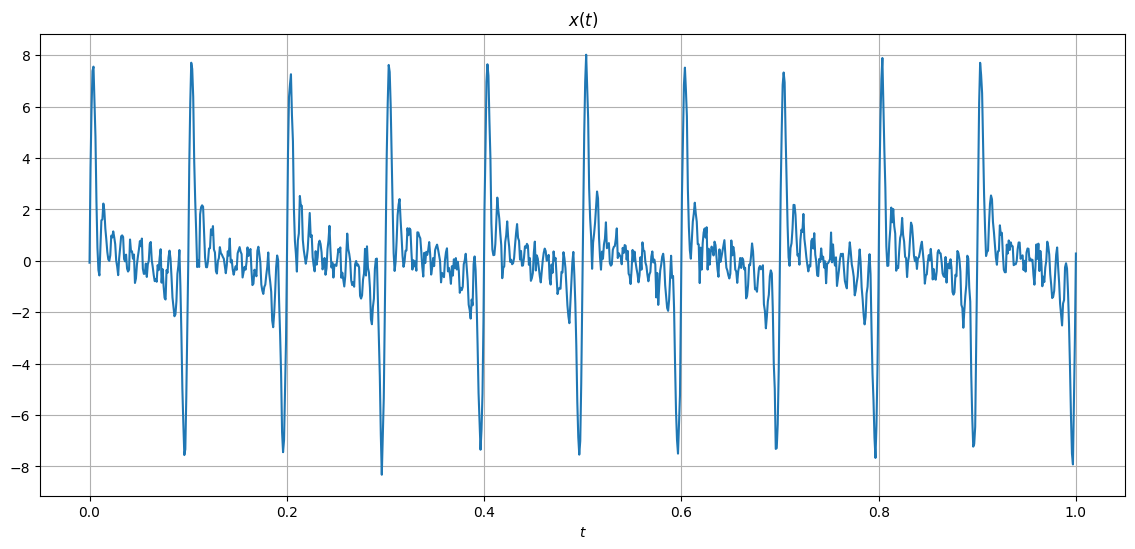

In [4]:
plt.figure(figsize=(14,6))
plt.plot(t,x)
plt.title('$x(t)$')
plt.xlabel('$t$')
plt.grid(True)
plt.show()

In [5]:
Xw=np.fft.fft(x)
freq = np.fft.fftfreq(len(t), 1/fs)

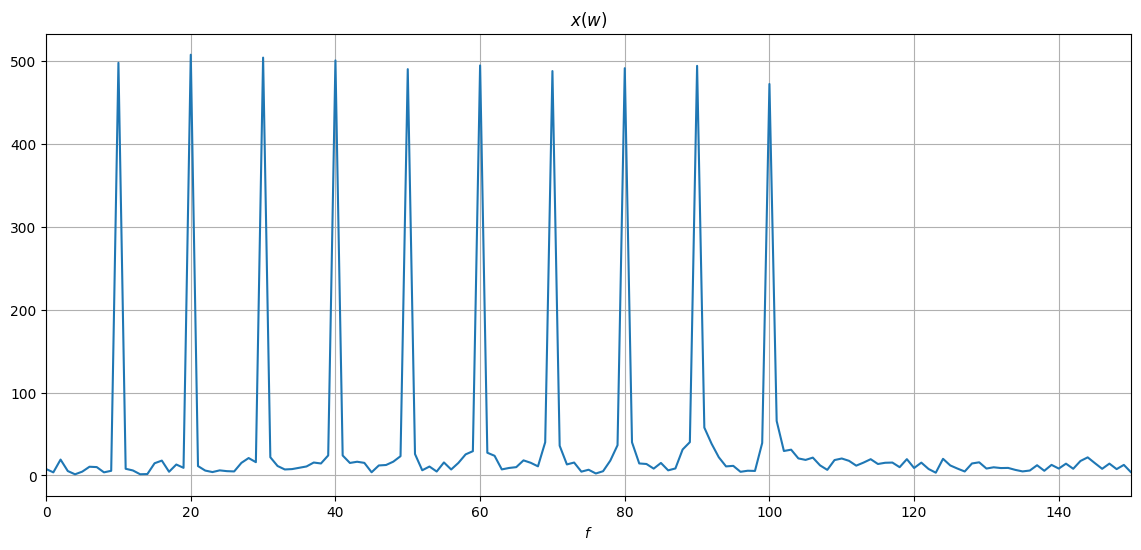

In [6]:
plt.figure(figsize=(14,6))

plt.plot(freq[:len(freq)//2], np.abs(Xw[:len(Xw)//2]))
plt.title('$x(w)$')
plt.xlabel('$f$')
plt.grid(True)
plt.xlim(0,150)
plt.show()

In [7]:
Xwf =[]
for i in freq:
  if i>=40 and i<=60:
    Xwf.append(Xw[freq.tolist().index(i)])
  else:
    Xwf.append(0)
Xwf=np.array(Xwf)

In [8]:
Xwf.shape

(1000,)

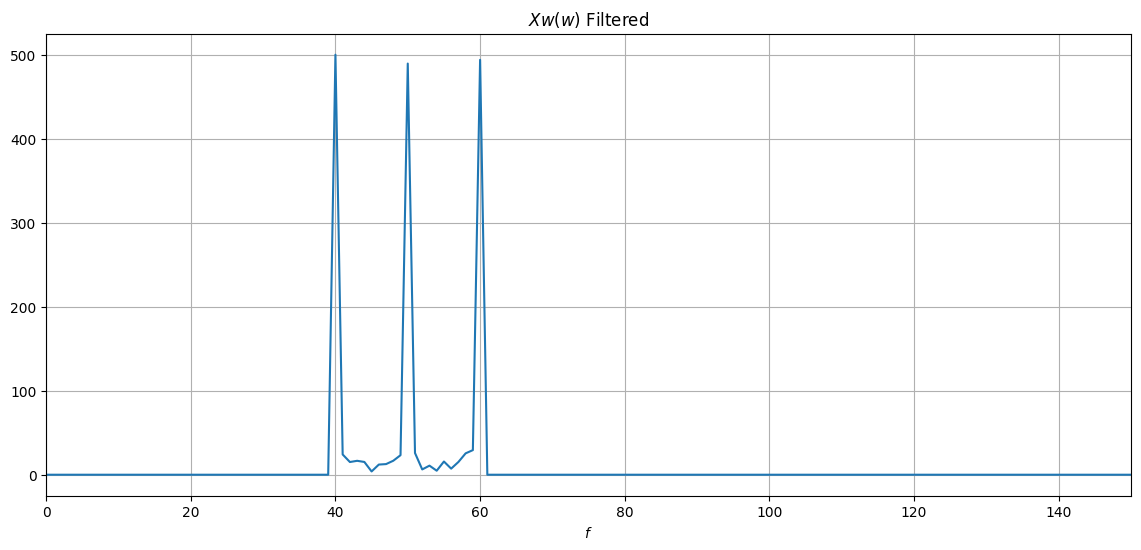

In [9]:
plt.figure(figsize=(14,6))

plt.plot(freq[:len(freq)//2], np.abs(Xwf[:len(Xwf)//2]))
plt.title('$Xw(w)$ Filtered')
plt.xlabel('$f$')
plt.grid(True)
plt.xlim(0,150)
plt.show()

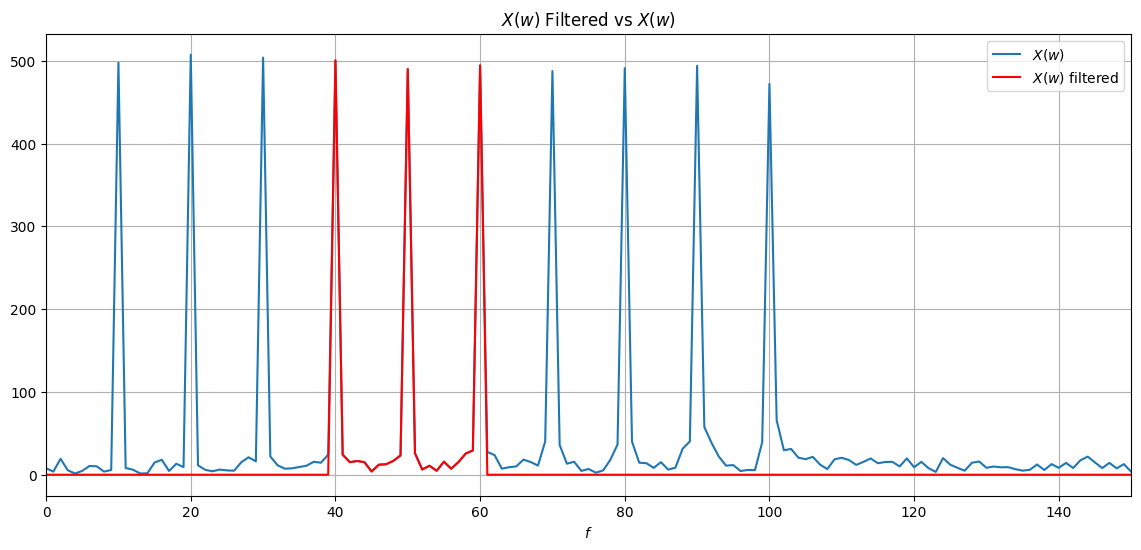

In [10]:
plt.figure(figsize=(14,6))
plt.plot(freq[:len(freq)//2], np.abs(Xw[:len(Xw)//2]), label = '$X(w)$')
plt.plot(freq[:len(freq)//2], np.abs(Xwf[:len(Xwf)//2]), 'r', label = '$X(w)$ filtered')
plt.title('$X(w)$ Filtered vs $X(w)$')
plt.xlabel('$f$')
plt.grid(True)
plt.xlim(0,150)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


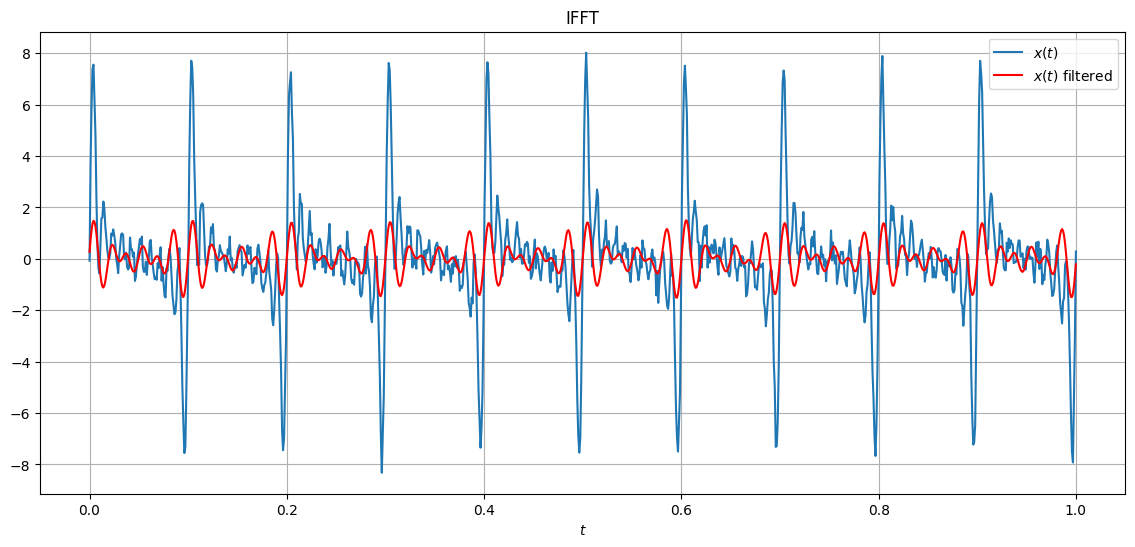

In [11]:
xt=np.fft.ifft(Xw)
xtf=np.fft.ifft(Xwf)
plt.figure(figsize=(14,6))
plt.plot(t,xt, label = '$x(t)$')
plt.plot(t,xtf, 'r', label = '$x(t)$ filtered')
plt.title('IFFT')
plt.xlabel('$t$')
plt.legend()
plt.grid(True)
plt.show()

#Segunda Parte

Realizar un ecualizador de 5 bandas.

In [14]:
# Función para aplicar filtro pasa banda
def band_pass_filter(signal, f_low, f_high, fs, order=4):
    nyquist = 0.5 * fs
    f_low = max(f_low, 1)  # Aseguramos que f_low > 0
    f_high = min(f_high, nyquist - 1)  # Aseguramos que f_high < Nyquist
    low = f_low / nyquist ; high = f_high / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, signal)


# Función principal del ecualizador
@interact(band1=(-10, 10, 1), band2=(-10, 10, 1),
          band3=(-10, 10, 1), band4=(-10, 10, 1), band5=(-10, 10, 1))
def equalizer(band1=0, band2=0, band3=0, band4=0, band5=0):
    # Definir las bandas
    bands = [
        (0, 100),  # Banda 1
        (100, 200),  # Banda 2
        (200, 300),  # Banda 3
        (300, 400),  # Banda 4
        (400, 500),  # Banda 5
    ]

    gains = [band1, band2, band3, band4, band5]
    # Procesar cada banda con sus ganancias
    filtered_signals = []
    for (f_low, f_high), gain in zip(bands, gains):
        filtered = band_pass_filter(x, f_low, f_high, fs)
        filtered_signals.append(filtered * np.power(10, gain / 20))

    # Sumar todas las bandas ecualizadas
    eq_signal = sum(filtered_signals)
    # Calculo FFT
    W_eq = np.fft.fft(eq_signal)
    freqs = np.fft.fftfreq(len(W_eq), 1 / fs)

    # Graficar señales
    plt.figure(figsize=(14, 5))

    # Gráfico de la señal en el dominio del tiempo
    plt.subplot(121), plt.plot(t, eq_signal, label="Señal Ecualizada", color='b')
    plt.xlabel("Tiempo (s)"), plt.ylabel("Amplitud"), plt.grid()
    # Gráfico de la FFT
    plt.subplot(122), plt.plot(freqs[:len(freqs)//2], np.abs(W_eq[:len(W_eq)//2]), label="FFT Ecualizada", color='b')
    plt.xlabel("Frecuencia (Hz)"), plt.ylabel("Amplitud"), plt.grid()
    plt.tight_layout()
    plt.xlim(0,300)
    plt.show()

interactive(children=(IntSlider(value=0, description='band1', max=10, min=-10), IntSlider(value=0, description…